# Data Prep

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, ensemble, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import some data to play with
iris = datasets.load_iris()

x = iris.data
y = iris.target
indices = range(x.shape[0])


x_train,x_test,y_train,y_test, indices_train, indices_test=train_test_split(x,y,indices, test_size=0.2,random_state=123)


# Into the kNN looking glass we go.

In [111]:
n_neighbors = 30
weights = 'uniform'

clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights) #try different weights, get different pictures!
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.88        30
weighted avg       0.93      0.90      0.90        30

[[13  0  0]
 [ 0  6  0]
 [ 0  3  8]]


### Let's refit using just the first two so we can see a plot. 

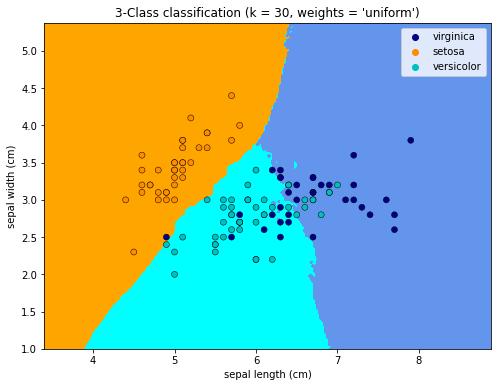

In [112]:
# heavily borrowed from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

clf.fit(x_train[:, 0:2], y_train)
y_pred = clf.predict(x_train[:,0:2])

h = 0.02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(["orange",  "cyan", "cornflowerblue",])
cmap_bold = [  "darkblue","darkorange","c"]

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
sns.scatterplot(
        x=x_train[:, 0],
        y=x_train[:, 1],
        hue=iris.target_names[y[indices_train]],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

### Blast from the past -- err, last class. Let's cross validate to get N

Heavily borrowed from: https://www.ritchieng.com/machine-learning-cross-validation/

In [113]:
from sklearn.model_selection import cross_val_score

# range of kwe want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

[0.9583333333333334, 0.9583333333333334, 0.9666666666666666, 0.95, 0.975, 0.9666666666666666, 0.975, 0.975, 0.9833333333333334, 0.975, 0.9833333333333334, 0.9833333333333334, 0.975, 0.975, 0.975, 0.9666666666666666, 0.9666666666666666, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.95, 0.9583333333333333, 0.95, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9666666666666666]
Length of list 30
Max of list 0.9833333333333334


Text(0, 0.5, 'Cross-validated accuracy')

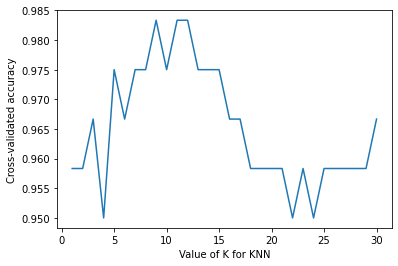

In [114]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [118]:
n_neighbors = 13
weights = 'uniform'

clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights) #try different weights, get different pictures!
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


# How about Random Forest?

In [128]:
## Look how similar the code is! Just the clf changes.
## This is why people use scikit learn. Makes fitting lots of classifiers really easy once the data is prepped!

## Don't be fooled by the similar accuracy. Somtimes RF works better. Sometimes, KNN. Sometimes, Neural Nets.
## Always use cross validation, regularization, etc for hyperparameters.

clf = ensemble.RandomForestClassifier(n_estimators = 500)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


### But where are the plots? I want to see some trees!

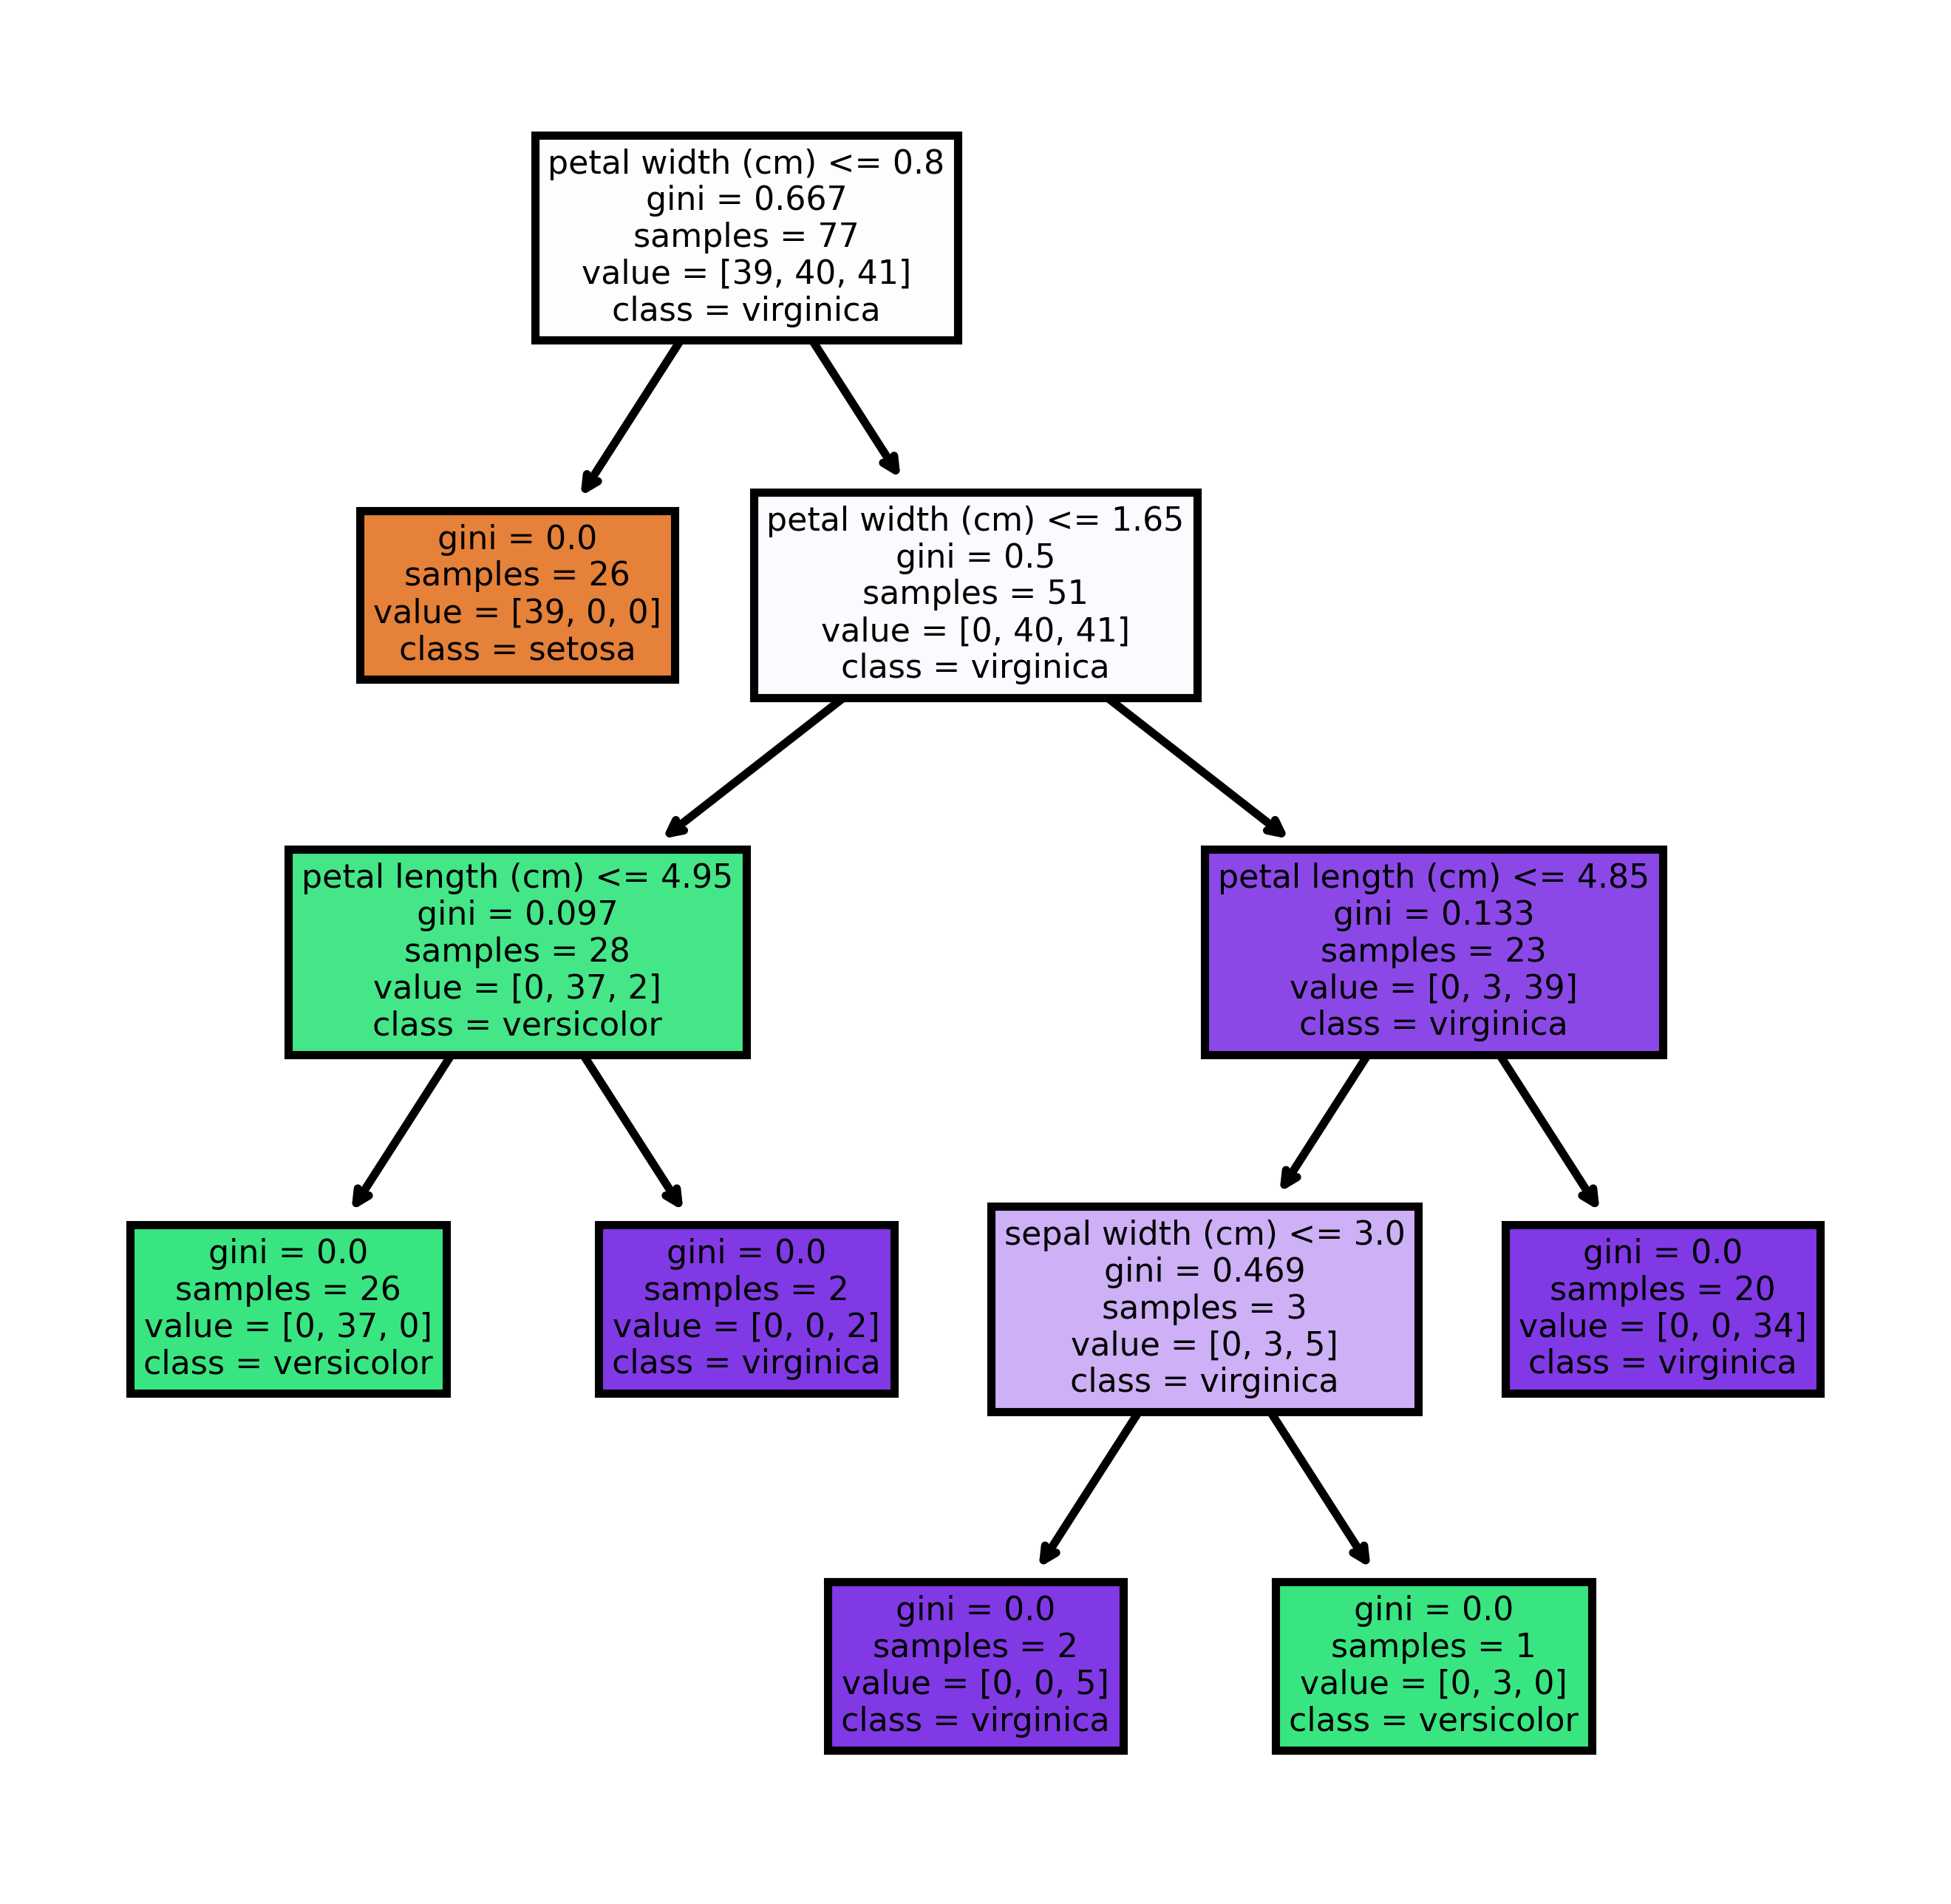

In [134]:
from sklearn import tree
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

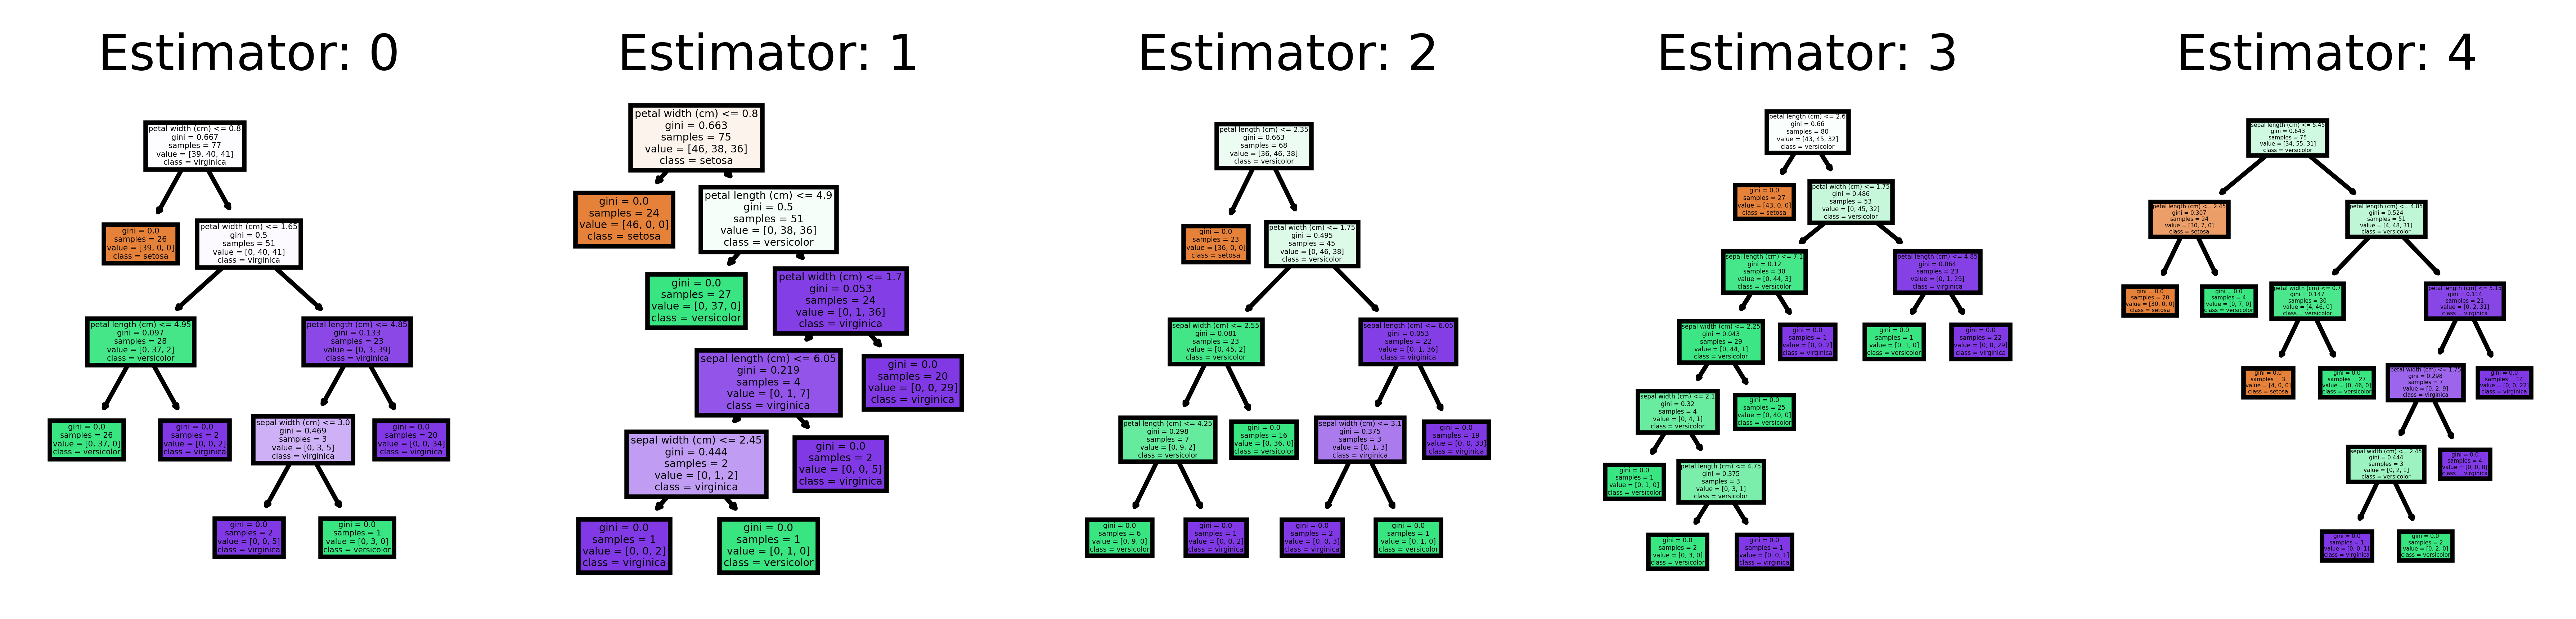

In [135]:
# This may not the best way to view each estimator as it is small
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)